In [1]:
from face_alignment import FaceAlignment,LandmarksType
import os 
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import PIL
from skimage import io


# for display in jupyterhub
from IPython import display

In [2]:
vedio_target_path = './test_video.mp4'
img_target_path = './test19.jpg'

In [3]:
fa = FaceAlignment(LandmarksType._2D, device='cpu')

## 將圖片轉成landmark

In [4]:

fa = FaceAlignment(LandmarksType._2D, device='cpu')
def plot_landmarks(frame, landmarks):
#     dpi = config.FEATURES_DPI
    dpi=100
    fig = plt.figure(figsize=(frame.shape[0] / dpi, frame.shape[1] / dpi), dpi=dpi)
    ax = fig.add_subplot(111)
    ax.axis('off')
    plt.imshow(np.ones(frame.shape))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Head
    ax.plot(landmarks[0:17, 0], landmarks[0:17, 1], linestyle='-', color='green', lw=2)
    # Eyebrows
    ax.plot(landmarks[17:22, 0], landmarks[17:22, 1], linestyle='-', color='orange', lw=2)
    ax.plot(landmarks[22:27, 0], landmarks[22:27, 1], linestyle='-', color='orange', lw=2)
    # Nose
    ax.plot(landmarks[27:31, 0], landmarks[27:31, 1], linestyle='-', color='blue', lw=2)
    ax.plot(landmarks[31:36, 0], landmarks[31:36, 1], linestyle='-', color='blue', lw=2)
    # Eyes
    ax.plot(landmarks[36:42, 0], landmarks[36:42, 1], linestyle='-', color='red', lw=2)
    ax.plot(landmarks[42:48, 0], landmarks[42:48, 1], linestyle='-', color='red', lw=2)
    # Mouth
    ax.plot(landmarks[48:60, 0], landmarks[48:60, 1], linestyle='-', color='purple', lw=2)

    fig.canvas.draw()
    data = PIL.Image.frombuffer('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb(), 'raw', 'RGB', 0, 1)
    plt.close(fig)
#     plt.show()
#     display.clear_output(wait=True)
    return data


def process_img_to_lm(input_img , fa):
    target_img_landmark = fa.get_landmarks(input_img)[0]
    target_img_lm = plot_landmarks(input_img,target_img_landmark)
    target_img_lm = np.array(target_img_lm)
    return target_img_lm

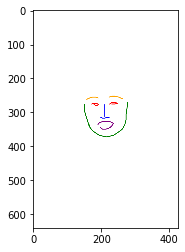

In [5]:
target_img = cv2.imread(img_target_path)[:,:,::-1]
res = process_img_to_lm(target_img , fa)
# plt.imshow(np.concatenate( (target_img,res) , axis=1) )
plt.imshow(res)


## 將影片轉成影格圖片 (list)

In [14]:
def extract_frame(video):
    cap = cv2.VideoCapture(video)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    w , h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) , int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    frames = np.empty((n_frames, h, w, 3), np.dtype('uint8'))
    
    count_i = 0
    while count_i < n_frames:
        ret , img = cap.read()
        frames[count_i] = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        
        count_i+=1
    cap.release()
    
    return frames , fps

In [15]:
imgs , fps = extract_frame(vedio_target_path)

## 將frames轉成影片

In [16]:
def frame_to_film(img_list , video_write_path ,fps):
    frame = img_list[0]
    height, width, channel = frame.shape
    
    video = cv2.VideoWriter(video_write_path, cv2.VideoWriter_fourcc(*'DIVX'), fps , (width,height))
    for i in range(len(img_list)):        
        video.write(img_list[i][:,:,::-1])   
    video.release()
    
    
    

In [17]:
frame_to_film(imgs,'./testing.mp4',fps)

In [19]:
## 將landmark轉成影片

lm_list=[]
for image in imgs:
    lm_list.append(process_img_to_lm(image,fa))
lm_list = np.array(lm_list)

frame_to_film(lm_list,'./testing.mp4',fps)
    